# SUPPORT VECTOR MACHINE

## Dataset Selection:

For this assignment, we'll utilize the widely recognized Mushroom Dataset


## Task 1: Exploratory Data Analysis (EDA)

### 1. Load the Mushroom dataset and perform fundamental data exploration.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [2]:
df = pd.read_csv('./mushroom.csv')
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [3]:
# Dropping Unnamed Column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
# Checking for Missing Values
df.isnull().sum()

cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [5]:
# Checking for Duplicated Rows
df.duplicated().sum()

1024

In [6]:
df.loc[df.duplicated()]

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
34,bell,smooth,pink,no,foul,notched,distant,broad,pink,enlarging,...,universal,brown,one,zone,black,scattered,leaves,poisonous,5.291009,5.436304
70,sunken,scaly,yellow,no,pungent,descending,distant,narrow,orange,enlarging,...,partial,white,none,zone,white,numerous,leaves,poisonous,4.746453,10.769935
76,conical,grooves,brown,no,foul,free,distant,broad,white,tapering,...,partial,yellow,two,large,chocolate,solitary,woods,poisonous,12.206952,5.061715
109,sunken,smooth,white,no,anise,attached,crowded,broad,black,tapering,...,partial,brown,two,sheathing,black,solitary,woods,edible,13.214007,14.549171
127,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,flat,grooves,green,yes,musty,notched,crowded,broad,chocolate,enlarging,...,universal,yellow,one,zone,brown,abundant,meadows,poisonous,14.834383,2.053744
1994,flat,scaly,pink,no,spicy,attached,distant,narrow,red,enlarging,...,universal,brown,two,zone,brown,abundant,meadows,poisonous,4.794826,4.576464
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020


There is actually no duplicate rows in the dataframe

In [7]:
# Checking for feature datatypes
df.dtypes

cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

### 2. Utilize histograms, box plots, or density plots to understand feature distributions.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

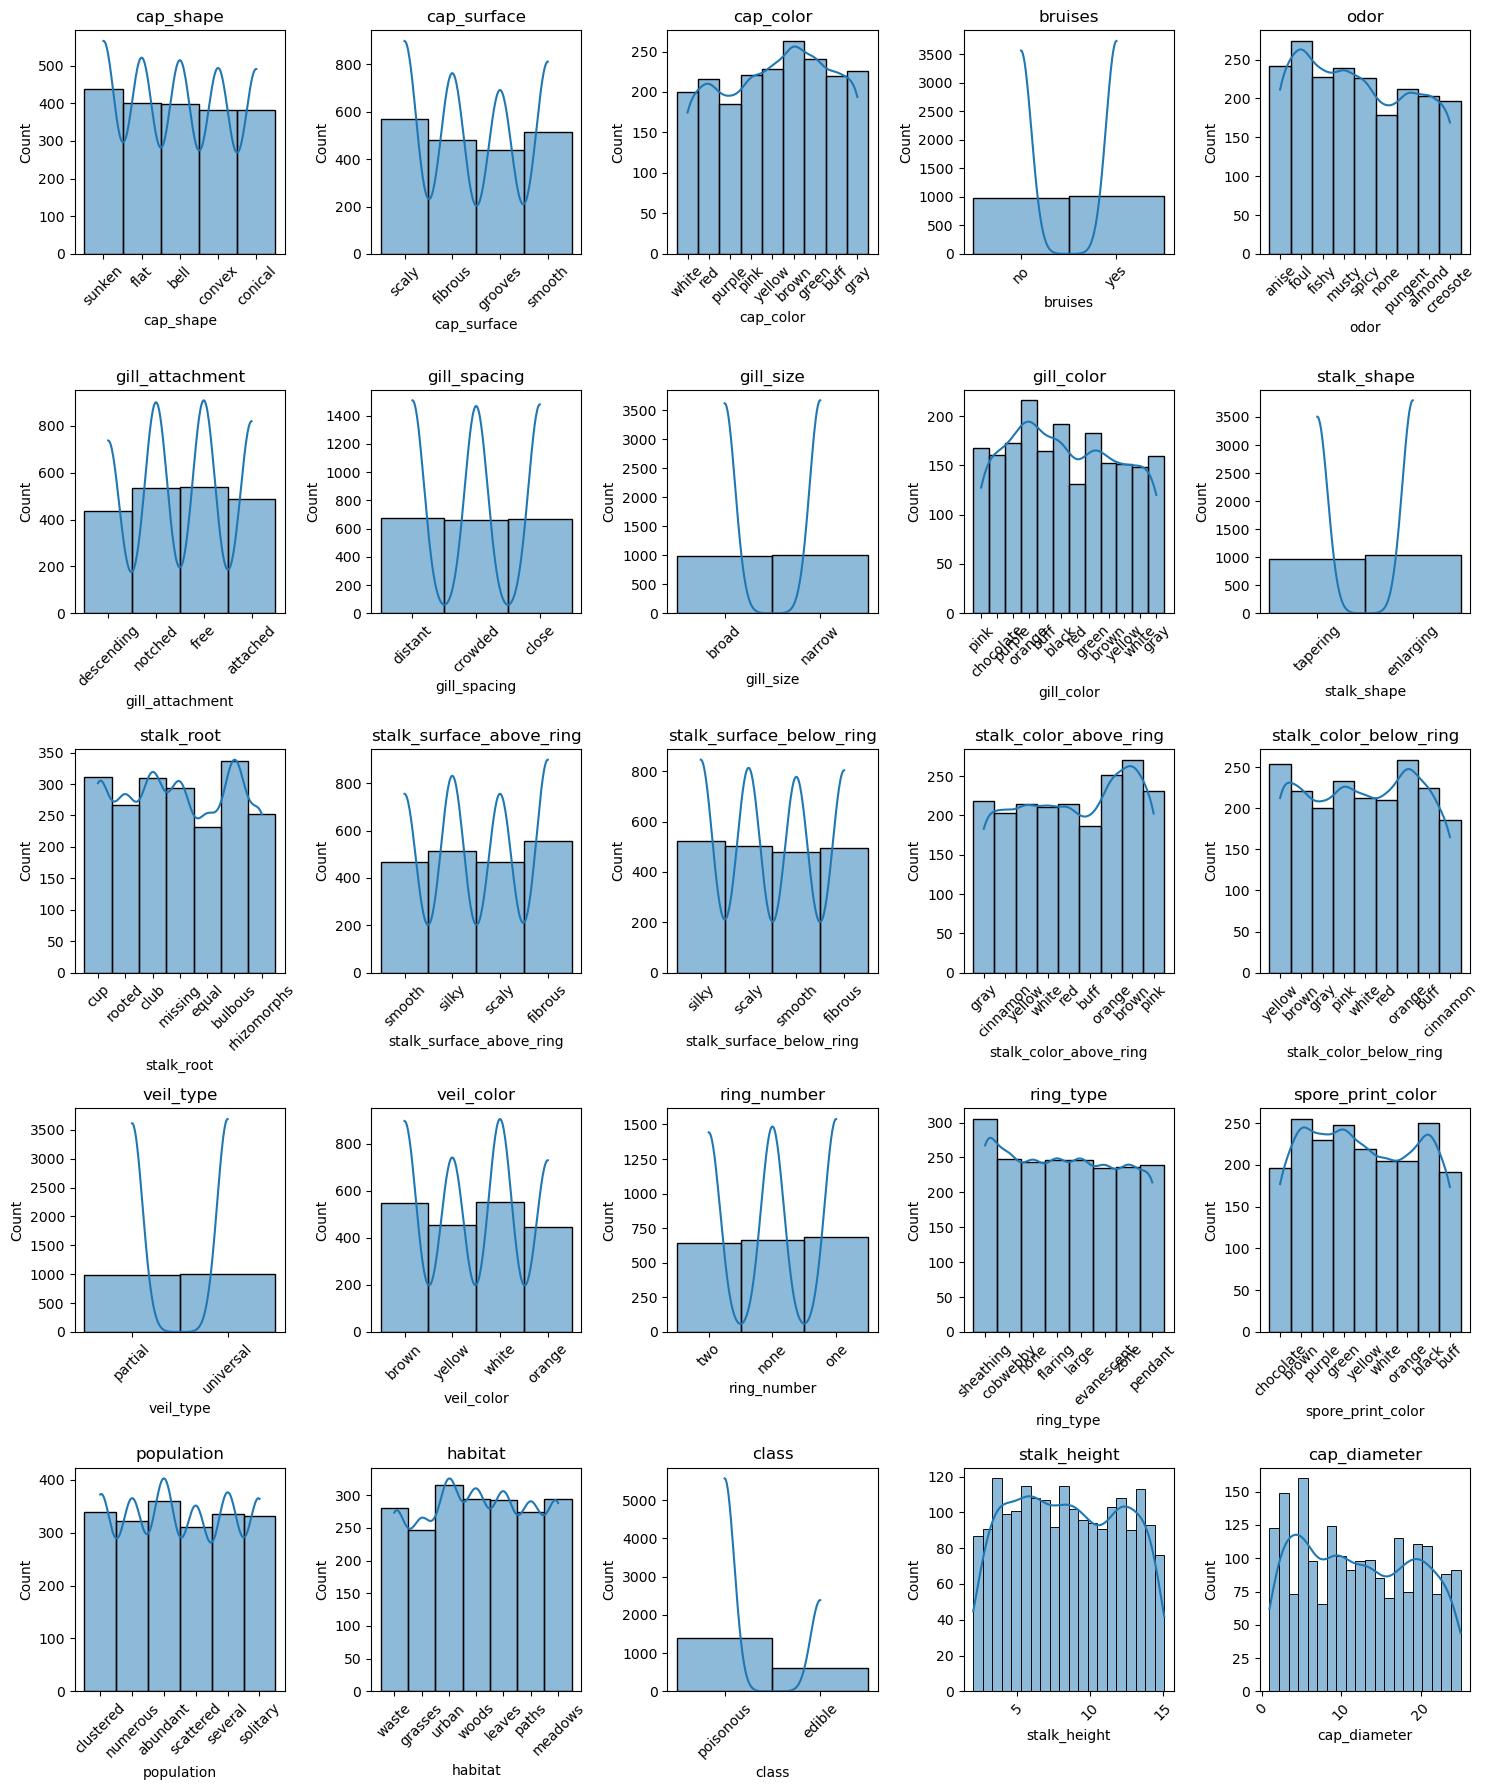

In [9]:
# Checking Distibution of Features
plt.figure(figsize=(15, 18))
for i, col in enumerate(df.columns):
    plt.subplot(5, 5, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()

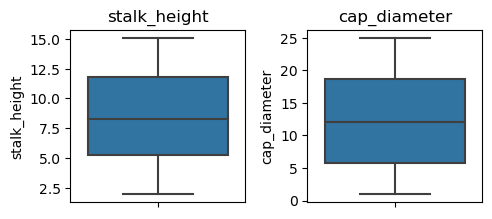

In [10]:
# Checking for Outliers using Boxplots
plt.figure(figsize=(12, 10))
for i, col in enumerate(df[['stalk_height', 'cap_diameter']]):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

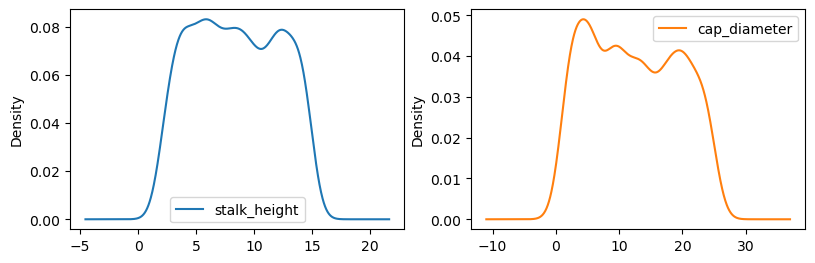

In [11]:
# Density Plot
df.plot(kind='density', subplots=True, layout=(6, 5), sharex=False, figsize=(25, 20))
plt.show()

### 3. Investigate feature correlations to discern relationships within the data.

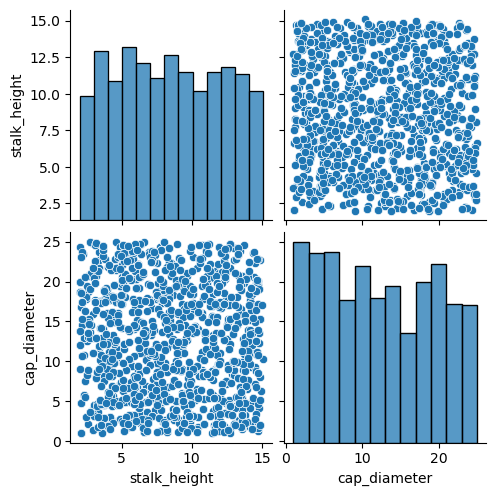

In [12]:
# Checking for Correlation between features
sns.pairplot(df)

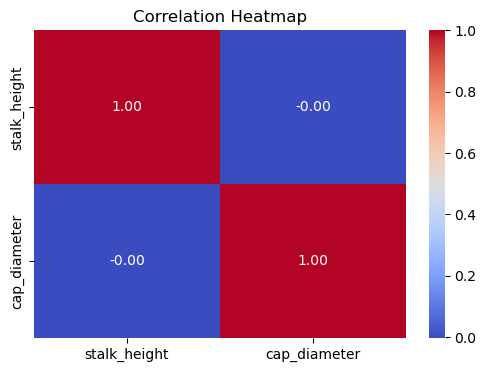

In [13]:
# Checking using Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df[['stalk_height', 'cap_diameter']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Task 2: Data Preprocessing

### 1. Encode categorical variables if necessary.

In [14]:
# Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.columns:
    if df[column].dtype == object:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

In [15]:
df

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,3,1,...,0,1,1,2,6,0,1,1,5.877891,17.464145
1996,4,2,5,1,5,0,2,1,9,1,...,0,2,1,7,8,2,5,1,6.500840,13.501957
1997,2,1,3,1,3,3,0,1,7,1,...,0,0,2,1,8,0,6,1,13.558064,11.270020
1998,0,3,7,0,7,2,0,1,6,0,...,1,3,1,0,1,5,6,1,11.092703,8.423199


### 2. Split the dataset into training and testing sets.

In [16]:
# Splitting the Dataset into Training and Testing Set
from sklearn.model_selection import train_test_split

# Feature and Target variable
X = df.drop('class', axis=1)
y = df['class']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Task 3: Data Visualization

### 1. Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

** Solved in Task 2 **

### 2. Visualize class distributions to gauge dataset balance or imbalance.


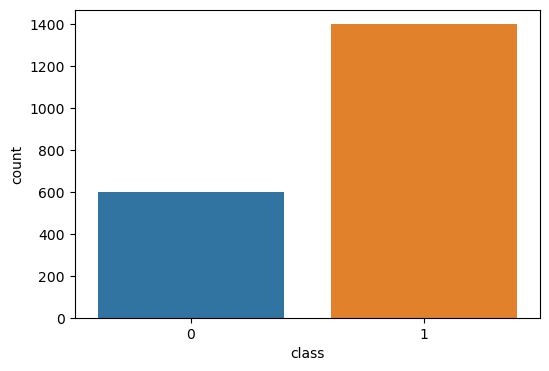

In [17]:
# Visualizing Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.show()

## Task 4: SVM Implementation

### 1. Implement a basic SVM classifier using Python libraries like scikit-learn.

In [18]:
# Implementing SVM
from sklearn.svm import SVC

# Initializing SVM 
svm_classifier = SVC(kernel='linear')

### 2. Train the SVM model on the training data.

In [19]:
# Training The Model
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

### 3. Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [20]:
# Evaluating Model Performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Making predictions
y_pred = svm_classifier.predict(X_test)

# Evaluating Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'\nConfusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'\nClassification Report: \n{classification_report(y_test, y_pred)}')

Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1 Score: 0.800599700149925

Confusiong Matrix: 
[[  0 133]
 [  0 267]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



## Task 5: Visualization of SVM Results

### 1. Visualize classification results on the testing data.

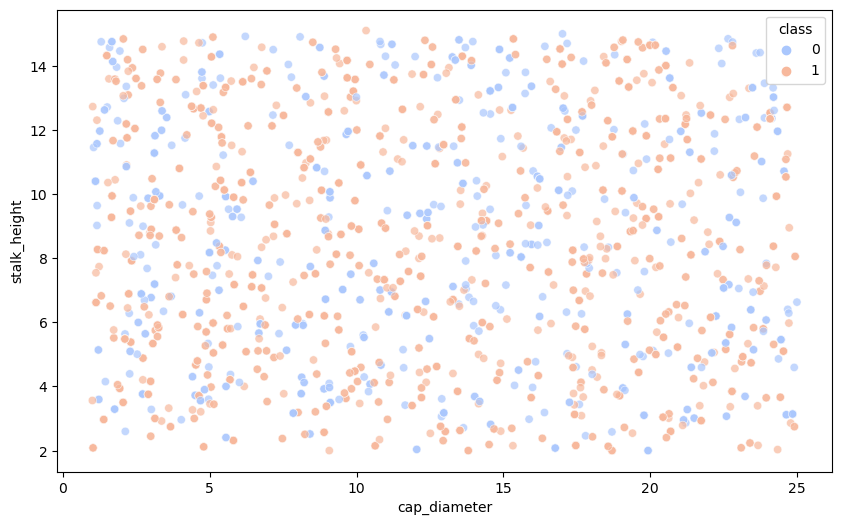

In [21]:
# Visualizing SVM Results
# Plotting decision boundaries is complex for high-dimensional data.
# For simplicity, visualizing only two variables
plt.figure(figsize=(10,6))
sns.scatterplot(x='cap_diameter', y='stalk_height', hue='class', data=df, palette='coolwarm', alpha=0.7)
plt.show()

In [22]:
# Adding decision boundary
import numpy as np

X = df[['cap_diameter', 'stalk_height']].values
y = df['class'].values

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X,y)

SVC(kernel='linear')

In [25]:
# Decision boundary Function
def plot_decision_boundaries(X, y, model, title='Decision Boundaries'):
    '''Decision Boundary'''

    # Defining the Plot Range
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    # Creating a Grid of Points
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )

    # Classifying each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshaping the Prediction Results
    Z = Z.reshape(xx.shape)

    # Visualization
    plt.contourf(xx, yy, Z, linewidths=2, color='black')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.title(title)
    plt.show()

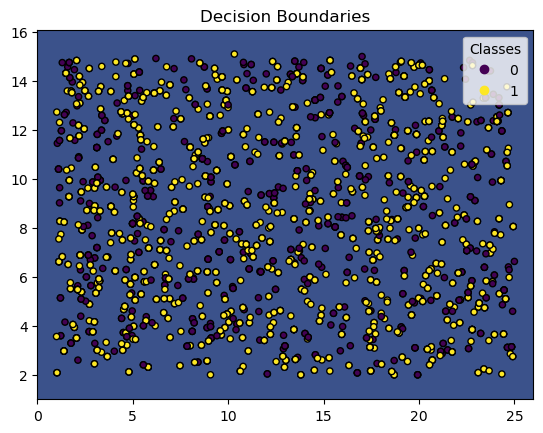

In [26]:
plot_decision_boundaries(X, y, svm_classifier)

## Task 6: Parameter Tuning and Optimization

### 1. Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

In [27]:
# Optimizing Model
from sklearn.model_selection import GridSearchCV

# Defining Parameter Grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Initializing GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters and best estimator
print(f'Best Parameters: {grid_search.best_params_}')
best_svm = grid_search.best_estimator_
print(f'Best Estimators: {best_svm}')

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=

In [28]:
# Best Parameters and best estimator
print(f'Best Parameters: {grid_search.best_params_}')
best_svm = grid_search.best_estimator_
print(f'Best Estimators: {best_svm}')

Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best Estimators: SVC(C=1, gamma=1)


## Task 7: Comparison and Analysis

### 1. Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

In [29]:
# Comparing Analysis

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    results[kernel] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

# Displaying Results
for kernel in kernels:
    print(f'Kernel: {kernel}')
    for metric in results[kernel]:
        print(f'{metric}: {results[kernel][metric]}')
    print()

Kernel: linear
accuracy: 0.6675
precision: 0.6675
recall: 1.0
f1_score: 0.800599700149925

Kernel: poly
accuracy: 0.6925
precision: 0.6846153846153846
recall: 1.0
f1_score: 0.8127853881278538

Kernel: rbf
accuracy: 0.6675
precision: 0.6675
recall: 1.0
f1_score: 0.800599700149925

Kernel: sigmoid
accuracy: 0.615
precision: 0.6955017301038062
recall: 0.7528089887640449
f1_score: 0.7230215827338128



### 2. Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

Strengths:

1. High-Dimensional Data Handling:

    SVMs are well-suited for datasets with many features, as they seek to maximize the margin between different classes. In the Mushroom dataset, which has several categorical features, SVM can effectively handle the high-dimensional feature space.

2. Effective Separation:

    The SVM's ability to find an optimal hyperplane helps in cases where classes are lineraly separable. In the Mushroom dataset, some features like 'odor' and 'spore_print_color' are highly indicative of the class, making SVM particularly effective in these scenarios.

3. Robustness to Overfitting:

    The results indicate that SVM maintains decent performance across different kernels without overfitting, which shows the robustness of SVM in dealing with variations in data.

Weaknesses:

1. Kernel Sensitivity:

    The performance of SVM is highly dependent on the choice of kernel and hyperparameters. The results show variations in accuracy, percision, recall, and F1-score across different kernels. This implies that selecting the right kernel and tuning parameters is crucial, which can be computationally intensive.

    For example, the polynomial kernel slightly outperforms the others but requires careful tuning of degree and other parameters to avoid overfitting.

2. Computational Complexity:

    Training SVMs, especially with non-linear kernels like polynomial and RBF, can be computationally expensive and time-consuming, particularly on larger datasets. This can be a limitation when dealing with real-time applications or very large datasets.

3. Class Imbalance Sensitivity:

    Although the Mushroom dataset is relatively balanced, SVM performance can be sensitive to class imbalance, potentially requiring techniques such as class weighting or resampling to handle such issues effectively.


### 3. Discuss practical implications of SVM in real-world classification tasks.

Practical Implications:

1. Bioinformatics:

    SVMs are widely used in bioinformatics for tasks such as gene expression analysis, protein classification, and disease prediction due to their effectiveness in high-dimensional spaces. The robustness of SVMs in handling numerous features makes them suitable for these complex biological data.

2. Text and Image Classification:

    SVMs are popular in text classification (e.g. spam detection, sentiment analysis) and image recognition tasks (e.g. face detection). Their ability to handle sparse and high-dimensional feature spaces is advantageour in these domains.

3. Fraud Detection:

    In finance, SVMs are used for fraud detection due to their ability to model complex relationships between features and detect anamalies. Their robustness against overfitting is particularly valuable in identifying fraudulent patterns that are not prevalent.

4. Medical Diagnosis:

    SVMs are employed in medical diagnostics for predicting diseases based on patient data.

    For example, they are used in cance detection, where features extracted from medical images or patient records are used to classify benign and malignant cases.

Limitations:

1. Scalability:

    For very large datasets, the computational cost of training SVMs with non-linear kernels can be prohibitive. In such cases, alternative algorithms like Random Forests, Gradient Boosting, or deep learning models might be preferred.

2. Parameter Tuning:

    SVMs require careful tuning of hyperparameters (e.g. C, gamma, kernel type), which can be challenging and computationally expensive. This tuning process is crucial for achieving optimal performance but can be a barrier in practice.

3. Interpretability:

    While SVMs provide good classification performance, the models can be less interpretable compared to simpler algorithms like decision trees. In domains where model interpretability is crucial, this can be a drawback.


### Conclusion:

Support Vector Machines (SVMs) provide robust and effective classification performance for the Mushroom dataset, handling high-dimensional categorical features well. However, their dependency on kernel selection and parameter tuning, along with computational complexity, highlights the importance of careful implementation and consideration of alternative for large-scale applications. Despite these challenges, SVMs remain a powerful tool for a variety of real-world classification tasks, especially where high accuracy in high-dimensional feature spaces is required.